In [ ]:
%run jupyterutils.py

from algorithms.supervised.classification.softmax.SoftMax import SoftMax

### Softmax model with multiple feature
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [2]:
def ModelEquation(x1,x2):
    return (9.8*x1 + 3.2*x2 + 7.6)%5

In [3]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
print("y = ", end='')
sp.pprint(ModelEquation(x1,x2))

y = (9.8⋅x₁ + 3.2⋅x₂ + 2.6) mod 5


In [4]:
total_data_points = 50000
rng = np.random.default_rng(0)             # reproducible
x1 = rng.uniform(0, 2, total_data_points)  # U(0,2)
x2 = rng.uniform(0, 2, total_data_points)  # completely separate draw
y = ModelEquation(x1,x2)
y = y.astype(np.int64)

# perm = np.random.permutation(len(x1))
# x1 = x1[perm]
# x2 = x2[perm]
# y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [5]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = np.array([x1[:training_numbers],x2[:training_numbers]]).T
training_labels = np.array(y[:training_numbers])

testing_attributes=np.array([x1[training_numbers:],x2[training_numbers:]]).T
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 2)
(7500, 2)
(42500,)
(7500,)


##### Model Training

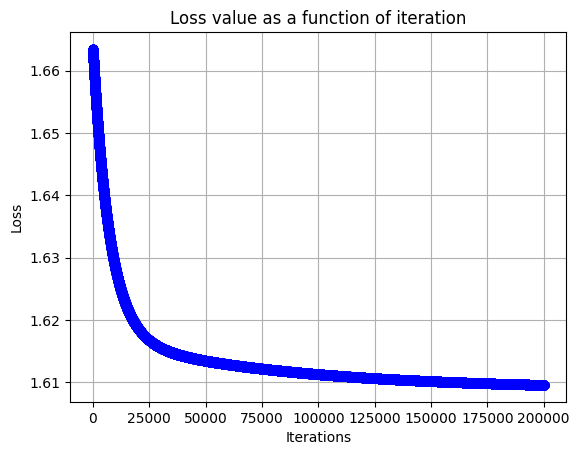

In [6]:
model = SoftMax(training_features, training_labels , learning_rate=0.0001)
model.train(200000)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

plotLineGraph("Iterations", "Loss", "Loss value as a function of iteration",x,values)



#### Prediction Details

In [7]:
print("Predicted weights ", model.weight, " bias ", model.bias)

actual     = testing_labels            # full y-vector, shape (n_samples,)
probs, pred_oh = model.predict(testing_attributes, predictOneHot=True)
loss = model.calculateCrossEntropyLoss(probs, pred_oh)


print("Prediction loss", loss)

Predicted weights  [[0.46964181 0.43714942 0.49989686 0.46981451 0.3209479 ]
 [0.22527865 0.21233696 0.31551551 0.20677713 0.31006191]]  bias  [ 0.00321196  0.0546144  -0.12495351 -0.00698044  0.07410759]
Prediction loss 1.5474088362511562
